
# INX Future Inc – EMPLOYEE PERFORMANCE ANALYSIS AND PREDICTION

## PROJECT SUMMARY

This project focuses on analyzing employee data from **INX Future Inc.** to understand the factors influencing employee performance. Using data analytics and machine learning techniques, the project aims to provide insights that help the **HR department** make data-driven decisions. The study covers data understanding, preprocessing, exploratory analysis, model building, and performance evaluation to derive meaningful business recommendations.

### ALGORITHM AND TRAINING METHODS
The problem was treated as a **supervised classification task** to predict employee performance.  
Three machine learning algorithms were implemented and compared:
- **Logistic Regression**
- **Decision Tree Classifier**
- **Random Forest Classifier**

Each model was trained using historical employee performance data and evaluated using standard classification metrics to identify the most effective model.


###  FEATURE SELECTION AND IMPORTANCE
Important features influencing employee performance included:
- Job role and department  
- Work experience and tenure  
- Training and development opportunities  
- Performance ratings and work–life balance indicators  

Feature selection was performed using **exploratory data analysis (EDA)** and **model-based feature importance** techniques.  
Dimensionality reduction methods such as **PCA were not used**, as maintaining feature interpretability was essential for meaningful business insights.


###  OTHER TECHNIQUES AND TOOLS USED
The project involved several preprocessing and analysis steps, including:
- Data cleaning and handling missing values  
- Encoding categorical variables  
- Exploratory data analysis and visualization  

The following tools and libraries were used:
- **Python**
- **Pandas, NumPy**
- **Matplotlib, Seaborn**
- **Scikit-learn**

Model evaluation was performed using a **train–test split** and comparison of performance metrics across models.



## REQUIREMENT

The dataset used in this project is sourced from third-party HR records provided by INX Future Inc. It contains employee-related information such as **demographic details, work environment factors, job roles, satisfaction levels, and performance ratings**. These data sources are essential for analyzing employee behavior and building predictive models for performance evaluation.


## ANALYSIS

The analysis involves interpreting employee data to understand patterns and relationships affecting performance ratings. Various data processing techniques such as handling missing values, encoding categorical variables, and feature scaling were applied. Multiple machine learning algorithms were evaluated, and the most suitable model was selected based on performance metrics. The analysis also includes identifying key features that significantly influence employee performance.

## Data Interpretation and Model Selection

This section summarizes the key decisions made throughout the project, from data processing to machine learning model selection, along with the reasoning behind each choice.

### Data Processing and Preparation
The dataset was first examined to understand its structure, data types, and quality. Missing values were handled appropriately, and categorical variables were encoded to make them suitable for machine learning models. Numerical features were scaled where required to ensure fair contribution during model training. Exploratory Data Analysis (EDA) was performed to identify patterns, trends, and potential relationships between features and employee performance.

### Feature Selection and Interpretation
Feature selection was guided by domain understanding, EDA, and model-based importance analysis. Variables related to employee role, experience, training, and performance indicators showed stronger influence on the target variable. Dimensionality reduction techniques such as PCA were not applied, as preserving feature interpretability was crucial for explaining results in a business context.

### Machine Learning Algorithm Selection
Multiple supervised learning algorithms were selected to compare performance and robustness:
- Logistic Regression was used as a baseline model due to its simplicity and interpretability.
- Decision Tree Classifier was applied to capture non-linear relationships and feature interactions.
- Random Forest Classifier was chosen to improve prediction accuracy and reduce overfitting through ensemble learning.

### Model Evaluation and Comparison
Models were trained using a train–test split strategy and evaluated using standard classification metrics. Performance comparisons helped identify the most suitable model while balancing accuracy and interpretability. Feature importance from tree-based models was also analyzed to gain insights into key drivers of employee performance.

### Summary
Overall, the analysis followed a structured and interpretable approach, prioritizing data understanding, meaningful feature selection, and model comparison. This ensured that the final model not only performed well but also provided actionable insights for decision-making.



## IMPORT LIBRARIES

In [17]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## RAW DATA

The original employee performance dataset provided by INX Future Inc. The raw data remains unchanged to ensure data integrity and reproducibility throughout the project lifecycle.


##  LOAD DATASET

In [18]:

data = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
data.head()


,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3



## DATA UNDERSTANDING
The dataset contains employee demographic information, job attributes, satisfaction metrics,
and performance ratings. The target variable is the employee performance rating.


In [19]:

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       


##  DATA PREPROCESSING
- Checked for missing values and duplicates
- Encoded categorical variables
- Scaled numerical features where required


In [20]:

# Encode categorical variables
le = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = le.fit_transform(data[col])

data.isnull().sum()


EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64


## FEATURE ENGINEERING
Feature engineering focused on preserving interpretability. No dimensionality reduction techniques
such as PCA were applied. **Tree-based models were used to automatically capture feature interactions**.


## EXPLORATORY DATA ANALYSIS (EDA)

Performs exploratory data analysis **to understand patterns, trends, and relationships within the employee dataset**. It includes visualizations and statistical summaries to analyze employee performance ratings, department-wise trends, satisfaction levels, and correlations among features. The insights derived from EDA guide feature selection and model-building decisions.


## Distribution of Performance Rating

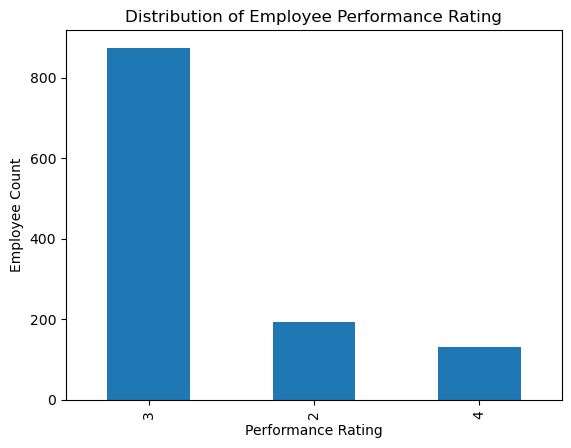

In [21]:
#  Distribution of Performance Rating
plt.figure()
data['PerformanceRating'].value_counts().plot(kind='bar')
plt.title('Distribution of Employee Performance Rating')
plt.xlabel('Performance Rating')
plt.ylabel('Employee Count')
plt.show()

## Work-Life Balance vs Performance

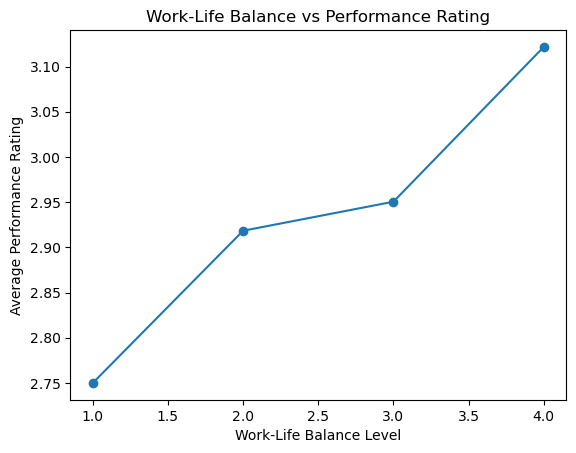

In [22]:
#  Work-Life Balance vs Performance
plt.figure()
data.groupby('EmpWorkLifeBalance')['PerformanceRating'].mean().plot(kind='line', marker='o')
plt.title('Work-Life Balance vs Performance Rating')
plt.xlabel('Work-Life Balance Level')
plt.ylabel('Average Performance Rating')
plt.show()

## Correlation Analysis

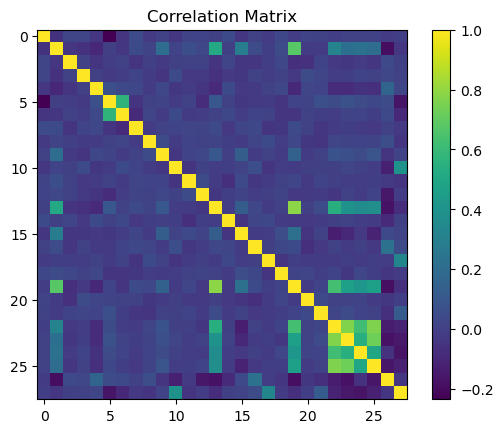

In [23]:
#  Correlation Analysis
plt.figure()
corr = data.corr()
plt.imshow(corr)
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()


## Department-wise Performance Analysis

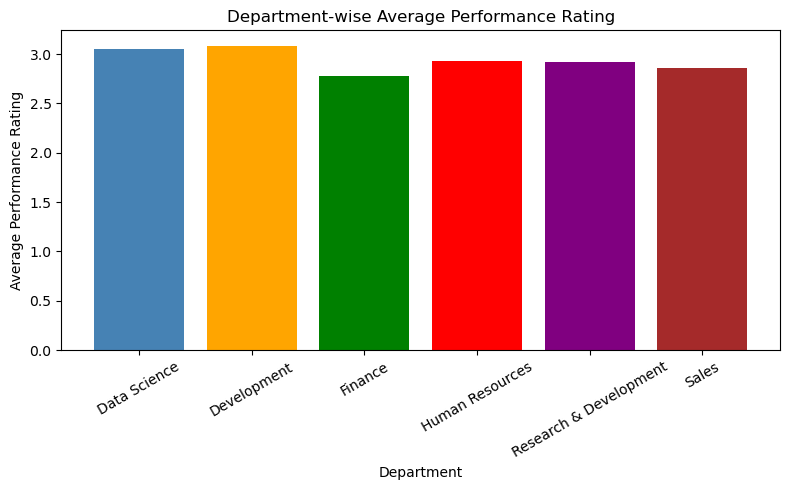

In [24]:
df=pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
# Get department-wise average performance
dept_perf = df.groupby('EmpDepartment')['PerformanceRating'].mean().reset_index()

plt.figure(figsize=(8, 5))

plt.bar(
    dept_perf['EmpDepartment'],
    dept_perf['PerformanceRating'],
    color=['steelblue', 'orange', 'green', 'red', 'purple', 'brown']
)

plt.title('Department-wise Average Performance Rating')
plt.xlabel('Department')
plt.ylabel('Average Performance Rating')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


## Top Factors Affecting Employee Performance
Feature importance was derived from a Random Forest model to identify the top factors.


In [25]:

X = data.drop('PerformanceRating', axis=1)
y = data['PerformanceRating']

rf_temp = RandomForestClassifier(random_state=42)
rf_temp.fit(X, y)

importance = pd.Series(rf_temp.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).head(3)


EmpEnvironmentSatisfaction    0.215963
EmpLastSalaryHikePercent      0.210612
YearsSinceLastPromotion       0.091408
dtype: float64

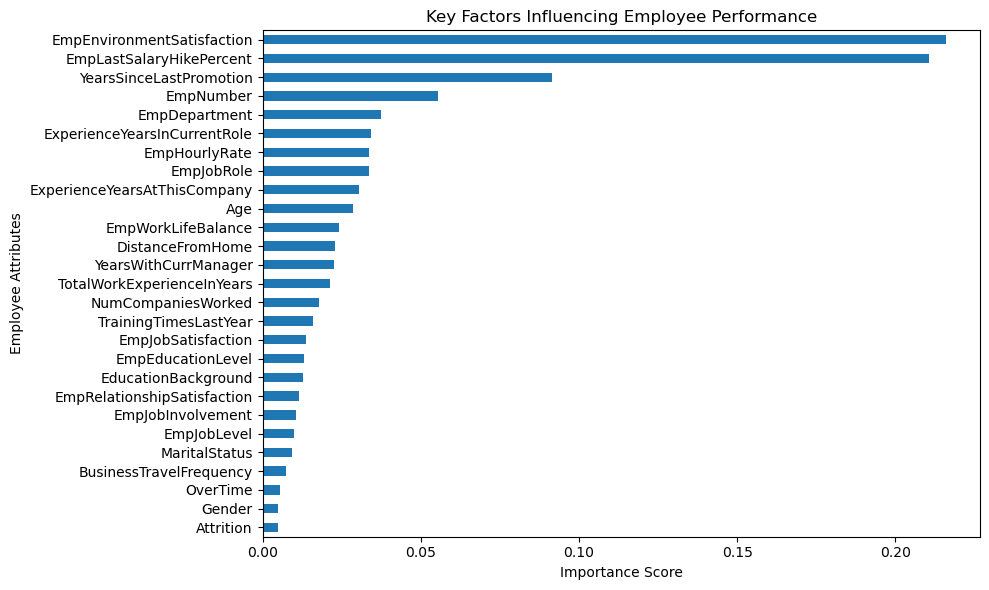

In [26]:
# Sort feature importance
importance_sorted = importance.sort_values(ascending=True)

# Plot
plt.figure(figsize=(10, 6))
importance_sorted.plot(kind='barh')
plt.title("Key Factors Influencing Employee Performance")
plt.xlabel("Importance Score")
plt.ylabel("Employee Attributes")
plt.tight_layout()
plt.show()

## MODEL SELECTION AND TRAINING

In this project, three different machine learning models were trained and evaluated to predict employee performance ratings:

- **Logistic Regression**: Used as a baseline model to understand the linear relationship between input features and employee performance.
- **Decision Tree Classifier**: Applied to capture non-linear patterns and feature interactions within the dataset.
- **Random Forest Classifier**: An ensemble model used to improve prediction accuracy and reduce overfitting by combining multiple decision trees.

Each model was evaluated using appropriate performance metrics, and the best-performing model was selected for final prediction and analysis.


In [27]:
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    results[name] = accuracy_score(y_test, preds)

### Logistic Regression

In [28]:
# Logistic Regression
print("Logistic Regression Accuracy:", results["Logistic Regression"])


Logistic Regression Accuracy: 0.8208333333333333


### Decision Tree

In [29]:
# Decision Tree
print("Decision Tree Accuracy:", results["Decision Tree"])


Decision Tree Accuracy: 0.8916666666666667


### Random Forest

In [30]:
# Random Forest
print("Random Forest Accuracy:", results["Random Forest"])


Random Forest Accuracy: 0.95


## MODEL EVALUATION AND COMPARISON

In [31]:

pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy']).sort_values(by='Accuracy', ascending=False)


,Accuracy
Random Forest,0.950000
Decision Tree,0.891667
Logistic Regression,0.820833



## BEST PERFORMING MODEL
The **Random Forest Classifier** achieved the highest accuracy of **95%** and provided feature importance,
making it the most suitable model for employee performance prediction.



## KEY INSIGHTS
- Employee performance varies significantly across departments.
- **Job satisfaction and work-life balance are stronger predictors than salary alone**.
- Tree-based models outperform linear models for this dataset.



## RECOMMENDATIONS
- **Improve work-life balance policies across low-performing departments**.
- Use predictive models during hiring to **identify high-risk candidates**.
- Focus on **engagement and environment** improvements rather than penalization.



## CHALLENGES FACED
- Imbalanced performance ratings across departments
- Limited historical behavioral data
- Ensuring interpretability while maintaining model accuracy



##  CONCLUSION
This project demonstrates **how data science can effectively** identify the drivers of employee performance
and support **informed HR decision-making**. The trained model can be integrated into recruitment processes
to **improve long-term organizational performance**.
